In [4]:
load('/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/merged123_imputed.rdata',verbose=TRUE)

Loading objects:
  merged123_imputed


In [2]:
library(mice)
library(ggfortify)
library(sva)
library("vsn")
library(Rcpm)


Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind


Loading required package: ggplot2

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.

Loading required package: genefilter

Loading required package: BiocParallel

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:mice’:

    cbind, rbind


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.

In [5]:
merged123_imp <- mice::complete(merged123_imputed, 5)

In [2]:
meta_pd = read.csv("/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/3batch_clinical_combined.csv")
rownames(meta_pd) = meta_pd$ID
meta_pd_noout = meta_pd[meta_pd$Name!='MT107',]

In [3]:
dim(meta_pd)

[1] 87  4

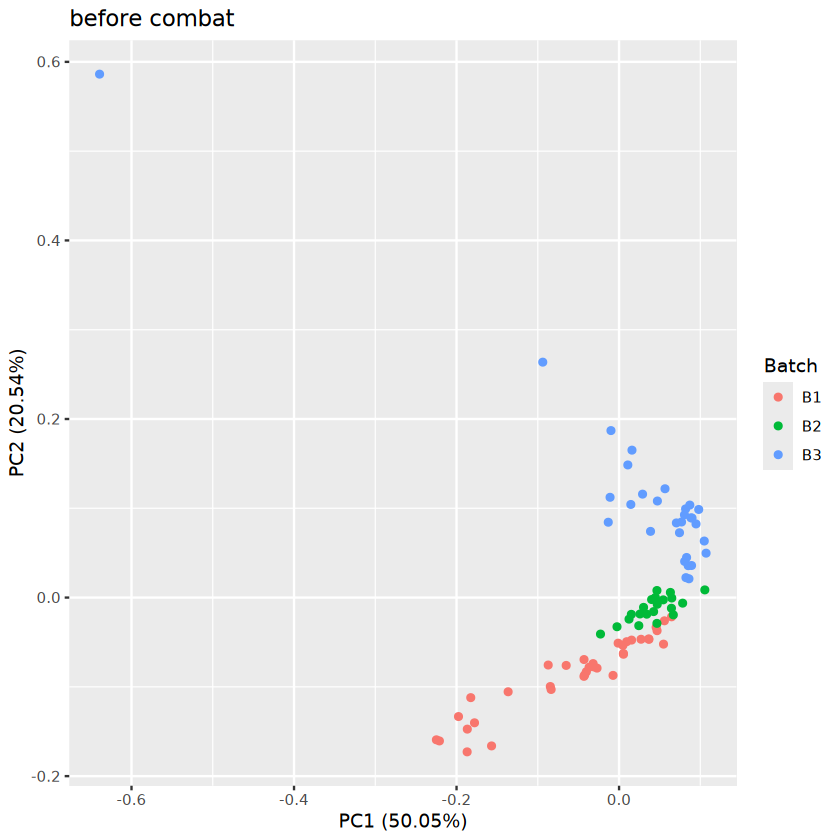

In [5]:
pca_res <- prcomp(merged123_imp, scale. = TRUE)
autoplot(pca_res, data = meta_pd, colour = 'Batch')+ggtitle('before combat')

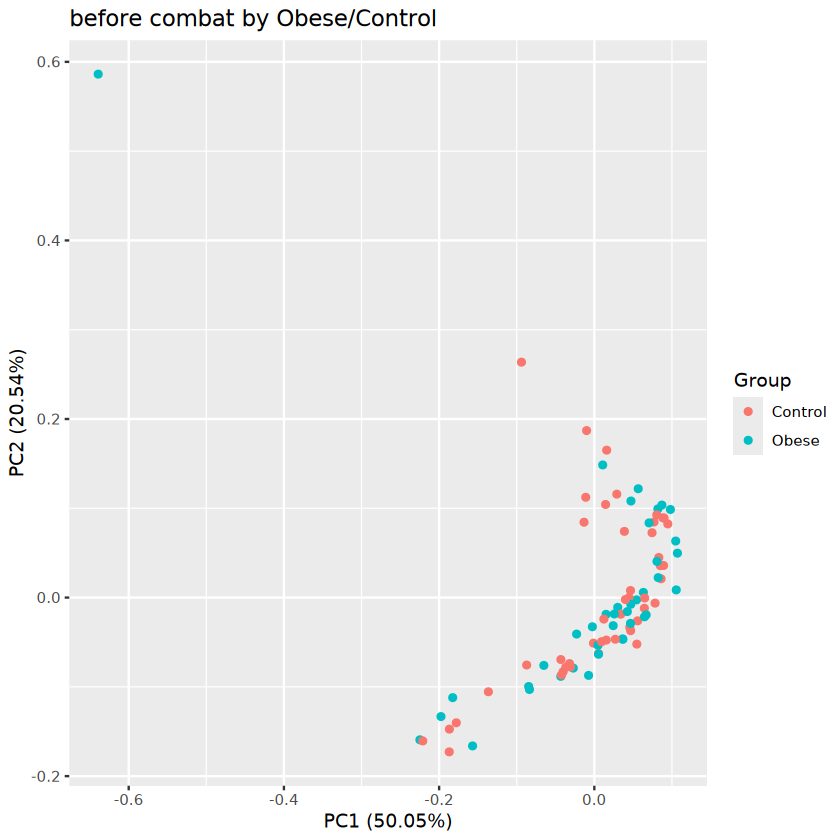

In [6]:
autoplot(pca_res, data = meta_pd, colour = 'Group')+ggtitle('before combat by Obese/Control')

In [7]:
meta_pd[1:5,]
sum(is.na(merged123_imp))

,ID,Name,Group,Batch
,<chr>,<chr>,<chr>,<chr>
MT12,MT12,MT12,Control,B1
MT13,MT13,MT13,Obese,B1
MT15,MT15,MT15,Control,B1
MT18,MT18,MT18,Obese,B1
MT19,MT19,MT19,Control,B1


[1] 0

In [8]:
library(preprocessCore)

In [6]:
merged123_imp_nooutlier = t(merged123_imp[rownames(merged123_imp)!='MT107',])

In [10]:
merged123_imp_nooutlier[1:5,1:5]

,MT12,MT13,MT15,MT16,MT18
AlphaLactose,10.571429,0.0000000,11.171429,4.9803922,10.872340
Arachidonicacid,6.261905,8.2833333,10.028571,8.0294118,3.723404
Benzoicacid,268.857143,30.2166667,247.000000,100.8823529,158.255319
BetaAlanine,4.666667,4.5833333,8.114286,7.1568627,14.425532
C10,0.382679,0.4925325,4.515236,0.8644403,3.884731


In [9]:
setwd('/nfs/dcmb-lgarmire/shared/public/COBRE_Metabolomics/data/cobre_project_data/third batch/updated_batch/2019 batch3/last update/modified2024/')
batch3_aa = read.csv("AA_3rd_batch_final20190227.csv")
colnames(batch3_aa) = batch3_aa[1,]
batch3_aa = batch3_aa[-c(1),]
rownames(batch3_aa) = batch3_aa[,1]
batch3_aa = batch3_aa[,-c(1)]
batch3_lipid = read.csv('lipids_3rd_batch_final 20190227.csv')
batch3_lipid = batch3_lipid[-c(2:14),]
colnames(batch3_lipid) = batch3_lipid[1,]
batch3_lipid = batch3_lipid[-c(1),]
rownames(batch3_lipid) = batch3_lipid[,1]
batch3_lipid = batch3_lipid[,-c(1)]
batch3_untar = read.csv('Untargeted_B3.csv')
rownames(batch3_untar) = batch3_untar[,1]
batch3_untar = batch3_untar[,-c(1)]

In [13]:
colnames(batch3_aa)
colnames(batch3_lipid)
colnames(batch3_untar)

[1] "Histidine"                 "isoleucine"               
 [3] "Proline"                   "Tryptophan"               
 [5] "N-Acetyl-l-ornithine"      "Kynurenine"               
 [7] "Methionine sulfoxide"      "trans-4-Hydroxy-L-proline"
 [9] "Putrescine"                "Spermidine"               
[11] "Spermine"

[1] "C10"             "C10:1"           "C10:2"           "C12"            
  [5] "C12:1"           "C12-DC"          "C14"             "C14:1"          
  [9] "C14:1-OH"        "C14:2"           "C14:2-OH"        "C16"            
 [13] "C16:1"           "C16:1-OH"        "C16:2"           "C16:2-OH"       
 [17] "C16-OH"          "C18"             "C18:1"           "C18:1-OH"       
 [21] "C18:2"           "C2"              "C3"              "C3:1"           
 [25] "C3-DC (C4-OH)"   "C3-OH"           "C4"              "C4:1"           
 [29] "C5"              "C5:1"            "C5:1-DC"         "C5-DC (C6-OH)"  
 [33] "C5-M-DC"         "C5-OH (C3-DC-M)" "C6 (C4:1-DC)"    "C6:1"           
 [37] "C7-DC"           "C8"              "C9"              "lysoPC a C14:0" 
 [41] "lysoPC a C16:0"  "lysoPC a C16:1"  "lysoPC a C17:0"  "lysoPC a C18:0" 
 [45] "lysoPC a C18:1"  "lysoPC a C18:2"  "lysoPC a C20:3"  "lysoPC a C20:4" 
 [49] "lysoPC a C24:0"  "lysoPC a C26:0"  "lysoPC a C26:1"  "lysoPC a C28:0" 
 [53] "lysoPC a C28:1"  "PC aa C24:0"     "PC aa C26:0"     "PC aa C28:1"    
 [57] "PC aa C30:0"     "PC aa C32:0"     "PC aa C32:1"     "PC aa C32:3"    
 [61] "PC aa C34:1"     "PC aa C34:2"     "PC aa C34:3"     "PC aa C34:4"    
 [65] "PC aa C36:0"     "PC aa C36:1"     "PC aa C36:2"     "PC aa C36:3"    
 [69] "PC aa C36:4"     "PC aa C36:5"     "PC aa C36:6"     "PC aa C38:0"    
 [73] "PC aa C38:3"     "PC aa C38:4"     "PC aa C38:5"     "PC aa C38:6"    
 [77] "PC aa C40:1"     "PC aa C40:2"     "PC aa C40:3"     "PC aa C40:4"    
 [81] "PC aa C40:5"     "PC aa C40:6"     "PC aa C42:0"     "PC aa C42:1"    
 [85] "PC aa C42:2"     "PC aa C42:4"     "PC aa C42:5"     "PC aa C42:6"    
 [89] "PC ae C30:0"     "PC ae C30:1"     "PC ae C30:2"     "PC ae C32:1"    
 [93] "PC ae C32:2"     "PC ae C34:0"     "PC ae C34:1"     "PC ae C34:2"    
 [97] "PC ae C34:3"     "PC ae C36:0"     "PC ae C36:1"     "PC ae C36:2"    
[101] "PC ae C36:3"     "PC ae C36:4"     "PC ae C36:5"     "PC ae C38:0"    
[105] "PC ae C38:1"     "PC ae C38:2"     "PC ae C38:3"     "PC ae C38:4"    
[109] "PC ae C38:5"     "PC ae C38:6"     "PC ae C40:1"     "PC ae C40:2"    
[113] "PC ae C40:3"     "PC ae C40:4"     "PC ae C40:5"     "PC ae C40:6"    
[117] "PC ae C42:0"     "PC ae C42:1"     "PC ae C42:2"     "PC ae C42:3"    
[121] "PC ae C42:4"     "PC ae C42:5"     "PC ae C44:3"     "PC ae C44:4"    
[125] "PC ae C44:5"     "PC ae C44:6"     "SM (OH) C14:1"   "SM (OH) C16:1"  
[129] "SM (OH) C22:1"   "SM (OH) C22:2"   "SM (OH) C24:1"   "SM C16:0"       
[133] "SM C16:1"        "SM C18:0"        "SM C18:1"        "SM C20:2"       
[137] "SM C24:0"        "SM C24:1"        "SM C26:0"        "SM C26:1"

[1] "X1.5.Anhydrosorbitol"            "X2.Hydroxy.3.methylbutyric.acid"
  [3] "X2.Hydroxybutyric.acid"          "X2.Hydroxypyridine"             
  [5] "X2.Phenylglycine"                "X3.hydroxypyridine"             
  [7] "X3.Methyl.2.oxovaleric.acid"     "Alpha.Lactose"                  
  [9] "Arachidonic.acid"                "Benzoic.acid"                   
 [11] "Beta.Alanine"                    "Carnosine"                      
 [13] "Citraconic.acid"                 "Citric.acid"                    
 [15] "D.2.Hydroxyglutaric.acid"        "D.Galactose"                    
 [17] "D.Glucose"                       "D.Maltose"                      
 [19] "Docosahexaenoic.acid"            "Dodecanoic.acid"                
 [21] "D.Tagatose"                      "D.Threitol"                     
 [23] "D.Xylose"                        "Erythritol"                     
 [25] "Erythrose"                       "Ethanolamine"                   
 [27] "Fumaric.acid"                    "Glucose.6.phosphate"            
 [29] "Glutaric.acid"                   "Glyceric.acid"                  
 [31] "Glycerol"                        "Glycerol.3.phosphate"           
 [33] "Glycine"                         "Glycolic.acid"                  
 [35] "Hexacosanoic.acid"               "Indoxyl.sulfate"                
 [37] "Isocitric.acid"                  "Isomaltose"                     
 [39] "L.Alanine"                       "L.Arabitol"                     
 [41] "L.Arginine"                      "L.Asparagine"                   
 [43] "L.Aspartic.acid"                 "L.Cysteine"                     
 [45] "L.Cystine"                       "L.Glutamic.acid"                
 [47] "L.Glutamine"                     "L.Homoserine"                   
 [49] "Linoleic.acid"                   "L.Leucine"                      
 [51] "L.Methionine"                    "L.Phenylalanine"                
 [53] "L.Proline"                       "L.Serine"                       
 [55] "L.Sorbose"                       "L.Threonine"                    
 [57] "L.Tyrosine"                      "L.Valine"                       
 [59] "Maleic.acid"                     "Malic.acid"                     
 [61] "Mannitol"                        "Methylcysteine"                 
 [63] "Methylmalonic.acid"              "Myoinositol"                    
 [65] "N.Acetyl.L.aspartic.acid"        "Oleic.acid"                     
 [67] "Palmitic.acid"                   "Pelargonic.acid"                
 [69] "Petroselinic.acid"               "Phosphate"                      
 [71] "Phosphoric.acid"                 "Picolinic.acid"                 
 [73] "Pyroglutamic.acid"               "Ribitol"                        
 [75] "Ribonolactone"                   "Stearic.acid"                   
 [77] "Succinic.acid"                   "Taurine"                        
 [79] "Threonic.acid"                   "Uric.acid"                      
 [81] "X3.Oxoalanine"                   "X4.Hydroxyl.proline"            
 [83] "Creatine"                        "D.Glucaric.acid"                
 [85] "Dihydrouracil"                   "D.Ribose"                       
 [87] "Gamma.Hydroxybutyric.Acid"       "Gluconolactone"                 
 [89] "Hydroxypropionic.acid"           "Hydroxypyruvic.acid"            
 [91] "Hydroxyurea"                     "Indolelactic.acid"              
 [93] "Ketoleucine"                     "L.Carnitine"                    
 [95] "L.Isoleucine"                    "L.Malic.acid"                   
 [97] "Melatonin"                       "MG.16.0.0.0.0.0."               
 [99] "Oxalic.acid"                     "Oxoglutaric.acid"               
[101] "Pantothenic.acid"                "Pipecolic.acid"                 
[103] "Purine"                          "Quinic.acid"                    
[105] "Sarcosine"                       "Sucrose"                        
[107] "Xanthosine"                      "Galactonic.acid"

In [11]:
merged123_imp_nooutlier_log = log2(merged123_imp_nooutlier+1)

In [12]:
library(mdatools)
data(people)
people[1:5,1:5]

,Height,Weight,Hairleng,Shoesize,Age
Lars,198,92,-1,48,48
Peter,184,84,-1,44,33
Rasmus,183,83,-1,44,37
Lene,166,47,-1,36,32
Mette,170,60,1,38,23


In [14]:
merged123_imp_nooutlier_log[1:5,1:5]
merged123_imp_nooutlier_log_stand = prep.autoscale(t(merged123_imp_nooutlier_log), center = TRUE, scale = TRUE)
merged123_imp_nooutlier_log_stand[1:5,1:5]
save(merged123_imp_nooutlier_log_stand,file='merged123_imp_nooutlier_log_stand.rdata')

,MT12,MT13,MT15,MT16,MT18
AlphaLactose,3.5324951,0.0000000,3.605427,2.5802401,3.569532
Arachidonicacid,2.8603480,3.2146429,3.463174,3.1746320,2.239827
Benzoicacid,8.0760521,4.9642446,7.954196,6.6707604,7.315198
BetaAlanine,2.5025003,2.4811267,3.188130,3.0280144,3.947248
C10,0.4674663,0.5777623,2.463423,0.8987426,2.288279


,AlphaLactose,Arachidonicacid,Benzoicacid,BetaAlanine,C10
MT12,-0.1645191,-0.5172064,1.2989279,-1.0367485,-0.10849317
MT13,-2.1188975,-0.2337343,-0.9539624,-1.0652008,0.06445693
MT15,-0.1241693,-0.0348840,1.2107066,-0.1240501,3.02127261
MT16,-0.6913611,-0.2657471,0.2815230,-0.3371929,0.56777106
MT18,-0.1440279,-1.0136866,0.7480836,0.8864762,2.74663820


In [33]:
#merged_123_imp_norm = normalize.quantiles(as.matrix(t(merged123_imp_nooutlier)))
#rownames(merged_123_imp_norm) = rownames(merged123_imp_nooutlier)
#colnames(merged_123_imp_norm) = colnames(merged123_imp_nooutlier)
#merged_123_imp_norm = readRDS('/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/merged_123_imp_norm.RDS')

#merged_123_imp_norm = normalize.quantiles(as.matrix(t(merged123_imp_nooutlier_log_stand)))
#rownames(merged_123_imp_norm) = colnames(merged123_imp_nooutlier_log_stand)
#colnames(merged_123_imp_norm) = rownames(merged123_imp_nooutlier_log_stand)
#saveRDS(merged_123_imp_norm,'merged_123_imp_quantile_norm_nooutlier_log_stand.rds')
merged_123_imp_quantile = readRDS('/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/merged_123_imp_quantile_norm_nooutlier_log_stand.rds')


In [34]:
as.matrix(merged_123_imp_quantile)[1:5,1:5]

,MT12,MT13,MT15,MT16,MT18
AlphaLactose,-0.6211521,-2.6966347,-0.72319369,-0.647380325,-0.70635589
Arachidonicacid,-0.9635657,-0.5323082,-0.69015769,-0.008700729,-1.22008733
Benzoicacid,0.7547389,-1.2200873,-0.03770775,0.785496807,-0.15464769
BetaAlanine,-1.5209415,-1.4322409,-0.70635589,-0.116833149,-0.02850437
C10,-0.5452818,-0.3766869,1.25340851,1.105597471,2.02749862


In [36]:
# normalize samples * variables (rows * columns)
#merged_123_imp_norm_pqn = pqn(as.matrix(t(merged123_imp_nooutlier)), n = "median", QC = NULL)
merged_123_imp_norm_pqn = t(pqn(as.matrix((merged123_imp_nooutlier_log_stand)), n = "median", QC = NULL))
merged_123_imp_norm_pqn[1:5,1:5]

,MT12,MT13,MT15,MT16,MT18
AlphaLactose,0.2129047,2.38659268,0.031001087,-0.6799828,0.05582871
Arachidonicacid,0.6693184,0.26326356,0.008709417,-0.2613735,0.39292939
Benzoicacid,-1.6809465,1.07448319,-0.302274660,0.2768898,-0.28997526
BetaAlanine,1.3416594,1.19977508,0.030971346,-0.3316434,-0.34361959
C10,0.1404013,-0.07260023,-0.754315005,0.5584268,-1.06466325


In [30]:
library(limma)
#ngenes*narrays
merged_123_imp_norm_vsn = normalizeVSN(as.matrix((merged123_imp_nooutlier)))  

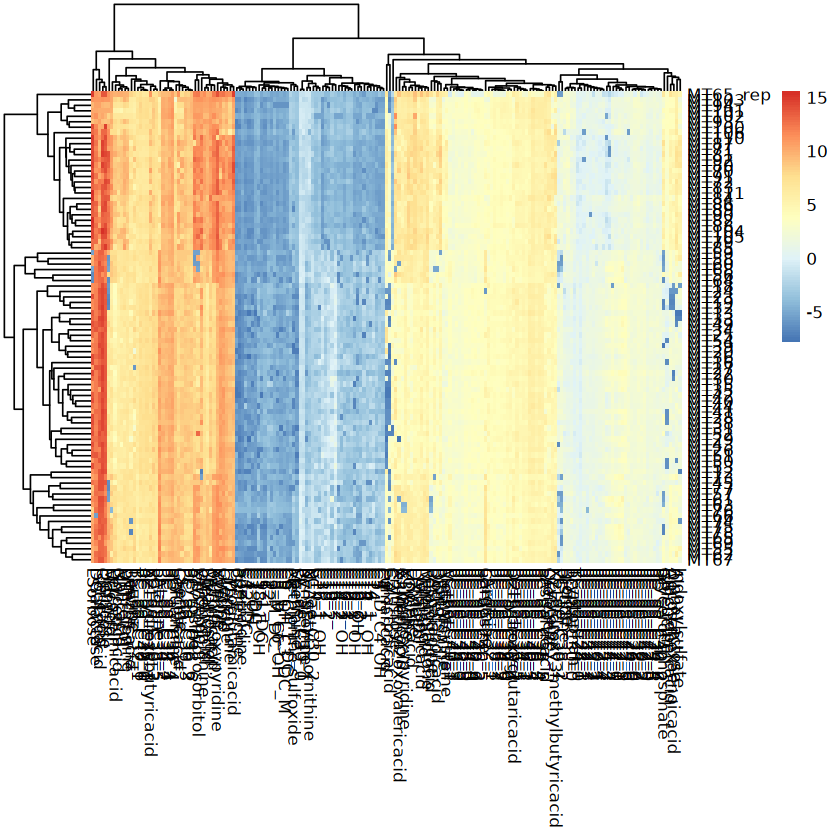

In [80]:
library(pheatmap)
pheatmap(t(merged_123_imp_norm_vsn))

In [31]:
merged_123_imp_norm_vsn[1:5,1:5]

,MT12,MT13,MT15,MT16,MT18
AlphaLactose,2.606325,-7.343603,2.2053230,2.46068023,2.3513011
Arachidonicacid,1.852240,2.372291,2.0499373,3.14858163,0.8166002
Benzoicacid,7.272950,4.238107,6.6693326,6.79811146,6.2093234
BetaAlanine,1.429213,1.519860,1.7450762,2.98284046,2.7578112
C10,-2.127943,-1.672763,0.9024122,-0.05160245,0.8770836


In [37]:
pheno = meta_pd_noout
edata = merged_123_imp_quantile
#edata = merged_123_imp_norm_vsn
#edata = merged_123_imp_norm_pqn
batch = pheno$Batch
mod = model.matrix(~as.factor(Group), data=pheno)

# reference-batch version, with covariates
combat_edata3_quantile = ComBat(dat=edata, batch=batch, mod=mod, par.prior=TRUE)
saveRDS(t(combat_edata3_quantile),'/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/META_3BATCH_NOOUT_log_stand_quantile_COMBAT.RDS')

Found3batches

Adjusting for1covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




In [39]:
pheno = meta_pd_noout
#edata = merged_123_imp_quantile
edata = merged_123_imp_norm_vsn
#edata = merged_123_imp_norm_pqn
batch = pheno$Batch
mod = model.matrix(~as.factor(Group), data=pheno)

# reference-batch version, with covariates
combat_edata3_vsn = ComBat(dat=edata, batch=batch, mod=mod, par.prior=TRUE)
saveRDS(t(combat_edata3_vsn),'/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/META_3BATCH_NOOUT_log_stand_vsn_COMBAT.RDS')

Found3batches

Adjusting for1covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




In [40]:
pheno = meta_pd_noout
#edata = merged_123_imp_quantile
#edata = merged_123_imp_norm_vsn
edata = merged_123_imp_norm_pqn
batch = pheno$Batch
mod = model.matrix(~as.factor(Group), data=pheno)

# reference-batch version, with covariates
combat_edata3_pqn = ComBat(dat=edata, batch=batch, mod=mod, par.prior=TRUE)
saveRDS(t(combat_edata3_pqn),'/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/META_3BATCH_NOOUT_log_stand_pqn_COMBAT.RDS')

Found3batches

Adjusting for1covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




In [103]:
dim(combat_edata3_vsn)
dim(meta_pd_noout)
meta_pd_noout[1:5,]

[1] 185  86

[1] 86  4

,ID,Name,Group,Batch
,<chr>,<chr>,<chr>,<chr>
MT12,MT12,MT12,Control,B1
MT13,MT13,MT13,Obese,B1
MT15,MT15,MT15,Control,B1
MT16,MT16,MT16,Obese,B1
MT18,MT18,MT18,Obese,B1


In [104]:
#save(combat_edata3_vsn,meta_pd_noout,file='batch_check.rdata')
pdf("batch_heatmap_check.pdf",height=20)
pheatmap(combat_edata3_vsn,annotation=meta_pd_noout[,c(3,4)],cluster_cols = FALSE)
dev.off()

pdf 
  3

In [100]:
dev.off()

pdf 
  3

In [86]:
meta_pd_noout[1:5,]

,ID,Name,Group,Batch
,<chr>,<chr>,<chr>,<chr>
MT12,MT12,MT12,Control,B1
MT13,MT13,MT13,Obese,B1
MT15,MT15,MT15,Control,B1
MT16,MT16,MT16,Obese,B1
MT18,MT18,MT18,Obese,B1


In [84]:
meta_pd_noout = meta_pd_noout[rownames(t(combat_edata3_vsn)),]

In [43]:
#combat_edata3[1:5,1:5]
#saveRDS(t(combat_edata3),'/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/META_3BATCH_NOOUT_QUANTNORM_COMBAT.RDS')
#saveRDS(t(combat_edata3),'/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/META_3BATCH_NOOUT_PQN_COMBAT.RDS')

In [44]:
merged123_imp_nooutlier[1:5,1:5]

,MT12,MT13,MT15,MT16,MT18
AlphaLactose,10.571429,0.0000000,11.171429,4.9803922,10.872340
Arachidonicacid,6.261905,8.2833333,10.028571,8.0294118,3.723404
Benzoicacid,268.857143,30.2166667,247.000000,100.8823529,158.255319
BetaAlanine,4.666667,4.5833333,8.114286,7.1568627,14.425532
C10,0.382679,0.4925325,4.515236,0.8644403,3.884731


In [49]:
pca_res <- prcomp(t(merged123_imp_nooutlier), scale. = TRUE)
pca_res_quantile <- prcomp(t(combat_edata3_quantile), scale. = TRUE)
pca_res_vsn <- prcomp(t(combat_edata3_vsn), scale. = TRUE)
pca_res_pqn <- prcomp(t(combat_edata3_pqn), scale. = TRUE)

In [46]:
library(ggpubr)

In [55]:
p1 = autoplot(pca_res, data = meta_pd_noout, colour = 'Batch',label=TRUE)+ggtitle('before combat')
p2 = autoplot(pca_res, data = meta_pd_noout, colour = 'Group',label=TRUE)+ggtitle('before combat by Obese/Control')
p3 = autoplot(pca_res_quantile, data = meta_pd_noout, colour = 'Batch',label=TRUE)+ggtitle('Quantile after combat')
p4 = autoplot(pca_res_quantile, data = meta_pd_noout, colour = 'Group',label=TRUE)+ggtitle('Quantile after combat by Obese/Control')
p5 = autoplot(pca_res_vsn, data = meta_pd_noout, colour = 'Batch',label=TRUE)+ggtitle('VSN after combat')
p6 = autoplot(pca_res_vsn, data = meta_pd_noout, colour = 'Group',label=TRUE)+ggtitle('VSN after combat by Obese/Control')
p7 = autoplot(pca_res_pqn, data = meta_pd_noout, colour = 'Batch',label=TRUE)+ggtitle('PQN after combat')
p8 = autoplot(pca_res_pqn, data = meta_pd_noout, colour = 'Group',label=TRUE)+ggtitle('PQN after combat by Obese/Control')

In [56]:
pdf('combat_adjustment_with_Quantile_VSN_PQN.pdf',width=20)
ggarrange(p1,p3,p5,p7,p2,p4,p6,p8,  ncol = 4, labels = c("A","B", "C","D",'E','F','G','H'), common.legend = TRUE, legend="right" )
dev.off()

$`1`

$`2`

attr(,"class")
[1] "list"      "ggarrange"

png 
  2

In [57]:
#pdf('combat_adjustment_three_batches_metabolites_PCA_LABEL.pdf',width=4,height=4)
#autoplot(pca_res, data = meta_pd, colour = 'Batch',label=TRUE)+ggtitle('before combat')
#autoplot(pca_res, data = meta_pd, colour = 'Group',label=TRUE)+ggtitle('before combat by Obese/Control')
#autoplot(pca_res_after, data = meta_pd, colour = 'Batch',label=TRUE)+ggtitle('after combat')
#autoplot(pca_res_after, data = meta_pd, colour = 'Group',label=TRUE)+ggtitle('after combat by group')
#dev.off()

In [58]:
#pdf('combat_adjustment_three_batches_metabolites_PCA_LABEL.pdf',width=4,height=4)
#autoplot(pca_res, data = meta_pd, colour = 'Batch',label=TRUE)+ggtitle('before combat')
#autoplot(pca_res, data = meta_pd, colour = 'Group',label=TRUE)+ggtitle('before combat by Obese/Control')
#autoplot(pca_res_after, data = meta_pd, colour = 'Batch',label=TRUE)+ggtitle('after combat')
#autoplot(pca_res_after, data = meta_pd, colour = 'Group',label=TRUE)+ggtitle('after combat by group')
#dev.off()

In [59]:
#pdf('combat_adjustment_three_batches_metabolites_PCA_LABEL_remove_outlier.pdf',width=4,height=4)
#autoplot(pca_res, data = meta_pd_noout, colour = 'Batch',label=TRUE)+ggtitle('before combat')
#autoplot(pca_res, data = meta_pd_noout, colour = 'Group',label=TRUE)+ggtitle('before combat by Obese/Control')
#autoplot(pca_res_after, data = meta_pd_noout, colour = 'Batch',label=TRUE)+ggtitle('after combat')
#autoplot(pca_res_after, data = meta_pd_noout, colour = 'Group',label=TRUE)+ggtitle('after combat by by Obese/Control')
#dev.off()

In [60]:
#pdf('combat_adjustment_three_batches_metabolites_PCA_LABEL_remove_outlier_PQN_norm.pdf',width=4,height=4)
#autoplot(pca_res, data = meta_pd_noout, colour = 'Batch',label=TRUE)+ggtitle('before combat')
#autoplot(pca_res, data = meta_pd_noout, colour = 'Group',label=TRUE)+ggtitle('before combat by Obese/Control')
#autoplot(pca_res_after, data = meta_pd_noout, colour = 'Batch',label=TRUE)+ggtitle('after combat')
#autoplot(pca_res_after, data = meta_pd_noout, colour = 'Group',label=TRUE)+ggtitle('after combat by by Obese/Control')
#dev.off()

In [61]:
intersect(meta_pd$Name,colnames(lognormalized_counts))

[1] "MT12" "MT18" "MT25" "MT26" "MT27" "MT28" "MT30" "MT31" "MT32" "MT33"
[11] "MT34" "MT35" "MT36" "MT38" "MT39" "MT41" "MT42" "MT43" "MT45" "MT50"
[21] "MT51" "MT53" "MT16" "MT55" "MT56" "MT57" "MT58" "MT59" "MT63" "MT65"
[31] "MT66" "MT67" "MT69" "MT74" "MT77" "MT78" "MT70" "MT71" "MT72" "MT80"
[41] "MT81" "MT82"

# Limma

In [2]:
pd_meth = readRDS('/nfs/dcmb-lgarmire/yhdu/cobre/cobre_pd.rds')
row.names(pd_meth) = pd_meth$Sample_Name
inter_pd_meta = merge(meta_pd,pd_meth,by.y='Sample_Name',by.x='Name',all.x = TRUE)
#write.csv(inter_pd_meta,'/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/inter_pd_meta.csv',quote=FALSE)

In [3]:
pd_meta_clinical = read.csv("/nfs/dcmb-lgarmire/shared/public/COBRE_Metabolomics/code/normlized_two_batchs_togther/batch1_2_3/three_chips_clinical_information_edited.csv")

In [4]:
pd_meta_clinical$chip

[1] "B1" "B1" "B1" "B1" "B1" "B1" "B1" "B1" "B1" "B1" "B1" "B1" "B1" "B1" "B1"
[16] "B1" "B1" "B1" "B1" "B1" "B1" "B1" "B1" "B1" "B1" "B1" "B1" "B1" "B1" "B1"
[31] "B1" "B1" "B1" "B1" "B1" "B1" "B2" "B2" "B2" "B2" "B2" "B2" "B2" "B2" "B2"
[46] "B2" "B2" "B2" "B2" "B2" "B2" "B3" "B3" "B3" "B2" "B2" "B2" "B2" "B2" "B2"
[61] "B3" "B3" "B3" "B3" "B3" "B3" "B3" "B3" "B3" "B3" "B3" "B3" "B3" "B3" "B3"
[76] "B3" "B3" "B3" "B3" "B3" "B3" "B3" "B3" "B3" "B3" "B3"

In [5]:
rownames(inter_pd_meta) = inter_pd_meta$ID

In [6]:
inter_pd_meta_comp = inter_pd_meta[complete.cases(inter_pd_meta),]

In [7]:
colnames(inter_pd_meta_comp)[2] = 'unique_id'

In [8]:
inter_pd_meta_comp2 = merge(inter_pd_meta_comp,pd_meta_clinical,by.y='ID',by.x='Name',all.x = TRUE)

In [9]:
inter_pd_meta_comp2 = inter_pd_meta_comp2[complete.cases(inter_pd_meta_comp2),]
rownames(inter_pd_meta_comp2) = inter_pd_meta_comp2$unique_id

In [12]:
#combat_edata3_inter_quantile = combat_edata3_quantile[,rownames(inter_pd_meta_comp2)]
combat_edata3_vsn = readRDS('/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/META_3BATCH_NOOUT_log_stand_vsn_COMBAT.RDS')
combat_edata3_inter_vsn = t(combat_edata3_vsn)[,rownames(inter_pd_meta_comp2)]
#combat_edata3_inter_pqn = combat_edata3_pqn[,rownames(inter_pd_meta_comp2)]

In [105]:
inter_pd_meta_comp2[1:5,]

,Name,unique_id,Group,Batch,Sample_Plate,Sample_Group,Slide,Array,Mat_Ethnicity.x,Mat_Age,⋯,chip,baby_gender,Mat_Ethnicity.y,Pat_Ethnicity.y,Maternal_Age,Paternal_Age,Gravidity.y,Parity.y,OBS_NORMAL_con,label
,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>,<chr>,<chr>,<int>,⋯,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>
MT12,MT12,MT12,Control,B1,plate_3,control,200705420004,R02C01,NHPI,17,⋯,B1,Female,3,3,17,18,1,0,24.6,Normal
MT13,MT13,MT13,Obese,B1,plate_3,obese,200705420004,R03C01,C,28,⋯,B1,Female,1,3,28,26,4,2,38.4,Obese
MT16,MT16,MT16,Obese,B1,plate_3,obese,200705420004,R05C01,NHPI,33,⋯,B1,Female,3,3,33,32,4,3,30.0,Obese
MT18,MT18,MT18,Obese,B1,plate_3,obese,200705420004,R06C01,NHPI,32,⋯,B1,Male,3,3,32,34,3,2,31.5,Obese
MT22,MT22,MT22,Control,B1,plate_3,control,200705420004,R01C02,NHPI,28,⋯,B1,Male,3,3,28,31,4,1,22.5,Normal


In [107]:
batch12_id = inter_pd_meta_comp2[inter_pd_meta_comp2$Batch%in%c('B1','B2'),]
table(batch12_id$Batch)


B1 B2 
29 20 

In [109]:
combat_edata3_inter_vsn_batch12 = combat_edata3_vsn[,rownames(batch12_id)]
inter_pd_meta_comp2$Sample_Group = relevel(factor(inter_pd_meta_comp2$Sample_Group), ref="control")

design_batch12 = model.matrix(~ Sample_Group + Parity.x + Gravidity.x +  Pat_Ethnicity.x + Paternal_Age,
                      data = inter_pd_meta_comp2[rownames(batch12_id),])

In [110]:
fit_12 = lmFit(combat_edata3_inter_vsn_batch12, design_batch12)
fit_12 = eBayes(fit_12)
allg.limma_12 <- topTable(fit_12, coef=2, n=dim(fit_12)[1])
sigg.limma_12 <- subset(allg.limma_12, adj.P.Val < 0.05)
nonsigg.limma_12 <- subset(allg.limma_12, adj.P.Val >= 0.05)
allg.limma_12[allg.limma_12$P.Value<0.05,]

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PC_ae_C40_3,0.3980463,2.952308,3.405968,0.001560715,0.1526132,-1.431350
Oleicacid,-0.7832354,4.970044,-3.281847,0.002204499,0.1526132,-1.671741
PC_aa_C38_3,0.4241751,7.896183,3.239828,0.002474809,0.1526132,-1.752235
PC_aa_C36_3,0.3907639,8.662418,2.669505,0.011081522,0.5077197,-2.791444
C16_1_OH,-0.8790977,-2.638090,-2.575238,0.013998544,0.5077197,-2.952044
X3hydroxypyridine,-0.9387762,5.402887,-2.468633,0.018135364,0.5077197,-3.129238
Arachidonicacid,-1.0425365,3.281166,-2.328371,0.025267129,0.5077197,-3.354780
Putrescine,0.3663638,-5.863631,2.306987,0.026552847,0.5077197,-3.388372
C6_C4_1_DC,0.4406452,-4.819579,2.301898,0.026867322,0.5077197,-3.396334


In [14]:
inter_pd_meta_comp2$Sample_Group = relevel(factor(inter_pd_meta_comp2$Sample_Group), ref="control")

design = model.matrix(~ Sample_Group + Parity.x + Gravidity.x +  Pat_Ethnicity.x + Paternal_Age,
                      data = inter_pd_meta_comp2)

In [13]:
library(limma)

In [75]:
fit_quantile = lmFit(combat_edata3_inter_quantile, design)
fit_quantile = eBayes(fit_quantile)
allg.limma_quantile <- topTable(fit_quantile, coef=2, n=dim(fit_quantile)[1])
sigg.limma_quantile <- subset(allg.limma_quantile, adj.P.Val < 0.05)
nonsigg.limma_quantile <- subset(allg.limma_quantile, adj.P.Val >= 0.05)
allg.limma_quantile[allg.limma_quantile$P.Value<0.05,]

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PC_ae_C40_3,0.4902880,-0.019782475,3.897176,0.0002288032,0.04232858,0.4574733
PC_aa_C38_3,0.4433732,0.008447898,3.210255,0.0020434401,0.15809814,-1.4041871
PC_aa_C40_3,0.4790251,-0.094196529,3.134283,0.0025637536,0.15809814,-1.5950328
PC_aa_C36_3,0.4722178,-0.035020228,2.908857,0.0049279849,0.17504983,-2.1416750
C16_1_OH,-0.5434875,-0.024438068,-2.869997,0.0054987932,0.17504983,-2.2328371
PC_aa_C38_4,0.4311000,-0.012987368,2.858608,0.0056772917,0.17504983,-2.2593775
PC_aa_C36_4,0.4255737,-0.064453334,2.552812,0.0129882868,0.34326187,-2.9412140
PC_ae_C38_3,0.3658741,-0.018237764,2.346321,0.0219494541,0.50758113,-3.3664534
Arachidonicacid,-0.2932245,0.069321179,-2.271998,0.0263274964,0.53159492,-3.5122279


In [18]:
fit_vsn = lmFit(combat_edata3_inter_vsn, design)
fit_vsn = eBayes(fit_vsn)
allg.limma_vsn <- topTable(fit_vsn, coef=2, n=dim(fit_vsn)[1])
sigg.limma_vsn <- subset(allg.limma_vsn, adj.P.Val < 0.05)
nonsigg.limma_vsn <- subset(allg.limma_vsn, adj.P.Val >= 0.05)
allg.limma_vsn[allg.limma_vsn$P.Value<0.05,]
save(allg.limma_vsn,file='/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/metabolite_de_allg.limma_vsn.rdata')

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PC_ae_C40_3,0.4171703,2.930850,3.595853,0.0006723465,0.1243841,-0.5195129
PC_aa_C38_3,0.3896984,7.881472,3.272969,0.0018032761,0.1668030,-1.3149108
PC_aa_C40_3,0.2922056,2.778838,3.108802,0.0029193666,0.1800276,-1.7010417
C16_1_OH,-0.7744639,-2.649365,-2.870075,0.0057326809,0.2136258,-2.2383474
Uricacid,-1.1039821,8.197889,-2.867493,0.0057736696,0.2136258,-2.2439935
PC_aa_C38_4,0.3141844,9.233018,2.722572,0.0085596899,0.2639238,-2.5550082
Oleicacid,-0.5821321,4.972869,-2.599122,0.0118544904,0.3132972,-2.8104960
PC_aa_C36_3,0.3323592,8.663971,2.546714,0.0135740354,0.3138996,-2.9162368
X2Hydroxypyridine,-0.4798103,10.950098,-2.453890,0.0171826966,0.3531999,-3.0994342


In [2]:
load('diablo_final_3omics_loadings_df_50.rdata',verbose=TRUE)

Loading objects:
  df_methyl_anno
  df_gene_loading
  df_metab_loading


In [4]:
limma_metab_sig = c('PC_ae_C40_3','PC_aa_C38_3','PC_aa_C40_3','C16_1_OH','Uricacid','PC_aa_C38_4',
'Oleicacid','PC_aa_C36_3','X2Hydroxypyridine','PC_aa_C36_4','Putrescine','PC_ae_C38_3',
'Arachidonicacid','C5_OH_C3_DC_M','PC_aa_C38_6','isoleucine','Petroselinicacid',
'C6_C4_1_DC','PC_aa_C42_5')
limma_metab_sig[limma_metab_sig%in%rownames(df_metab_loading)]

[1] "PC_ae_C40_3"       "PC_aa_C40_3"       "PC_aa_C38_4"      
[4] "Oleicacid"         "X2Hydroxypyridine" "Putrescine"       
[7] "Arachidonicacid"   "C5_OH_C3_DC_M"     "PC_aa_C42_5"

In [77]:
fit_pqn = lmFit(combat_edata3_inter_pqn, design)
fit_pqn = eBayes(fit_pqn)
allg.limma_pqn <- topTable(fit_pqn, coef=2, n=dim(fit_pqn)[1])
sigg.limma_pqn <- subset(allg.limma_pqn, adj.P.Val < 0.05)
nonsigg.limma_pqn <- subset(allg.limma_pqn, adj.P.Val >= 0.05)
allg.limma_pqn[allg.limma_pqn$P.Value<0.05,]

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PC_ae_C38_6,0.7293011,-0.5906590,2.410116,0.01905981,0.5322313,-4.456924
PC_ae_C36_1,0.7774141,-0.5650432,2.295817,0.02522971,0.5322313,-4.471500
DGalactose,0.9960991,-0.4458595,2.258063,0.02762655,0.5322313,-4.476208
Benzoicacid,0.6615466,-0.1234280,2.204644,0.03136137,0.5322313,-4.482778
PC_aa_C38_0,0.5520409,-0.4726870,2.174964,0.03362278,0.5322313,-4.486380
PC_aa_C40_3,0.7119141,-0.3855441,2.153343,0.03535900,0.5322313,-4.488982
PC_aa_C40_6,0.7494631,-0.6078796,2.093143,0.04061266,0.5322313,-4.496128
PC_ae_C38_4,0.6040191,-0.5192589,2.072092,0.04260362,0.5322313,-4.498592
PC_aa_C42_4,0.5820426,-0.4790055,2.033287,0.04649606,0.5322313,-4.503085


In [112]:
load('Cobre_meta_sig.rds',verbose=TRUE)

Loading objects:
  meta_df
  sig.limma


In [114]:
dim(meta_df)

[1]  49 202

In [120]:
colnames(meta_df) = c("X3hydroxypyridine","X2Hydroxybutyricacid","Alpha.ketoisovaleric.acid","Carnosine","BetaAlanine","Citricacid","DXylose","Glycolicacid","DGlucose",
"Glycine","Glycerol3phosphate","Glycerol","Fumaricacid","Glycericacid","DGalactose","LGlutamicacid","LTyrosine","LPhenylalanine","LAlanine","LThreonine",
"LAsparagine","Maleicacid","LLysine","AlphaLactose","LSerine","LLacticacid","LAsparticacid","LCystine","Isocitricacid","Oleicacid","Myoinositol","Ornithine",
"Palmiticacid","OPhosphoethanolamine","Pyruvicacid","Sorbitol","Taurine","Pyroglutamicacid","Uricacid","Urea","Uracil","X2Hydroxy3methylbutyricacid",
"LAlphaaminobutyricacid","X3Methyl2oxovalericacid","Ribitol","LArginine","Caproicacid","LAlloisoleucine","Creatinine","Galactonicacid","LCysteine",
"D2Hydroxyglutaricacid","Dodecanoicacid","LGlutamine","DFructose","Glutaricacid","Linoleicacid","Indoxylsulfate","LLeucine","LMethionine","LPipecolicacid",
"Malicacid","Mannitol","Stearicacid","Pelargonicacid","LValine","Arachidonicacid","LSorbose","LArabitol","Benzoicacid","Ribonolactone","Petroselinicacid",
"Methylcysteine","Docosahexaenoicacid","Arachidicacid","Erythrose","X15Anhydrosorbitol","DThreitol","X2Hydroxypyridine","Histidine","isoleucine","Proline",
"Tryptophan","N_Acetyl_l_ornithine","Kynurenine","Methioninesulfoxide","trans4HydroxyLproline","Putrescine","Spermidine","Spermine",
"C10","C10_1","C10_2","C12","C12_DC","C12_1","C14","C14_1","C14_1_OH","C14_2","C14_2_OH","C16","C16_OH","C16_1","C16_1_OH","C16_2","C16_2_OH","C18",
"C18_1","C18_1_OH","C18_2","C2","C3","C5_OH_C3_DC_M","C3_OH","C3_1","C4","C3_D_C4_OH","C4_1","C5","C5_D_C6_OH","C5_M_DC","C5_1","C5_1_DC","C6_C4_1_DC",
"C6_1","C7_DC","C8","C9","PC_aa_C24_0","PC_aa_C26_0","PC_aa_C28_1","PC_aa_C30_0","PC_aa_C32_0","PC_aa_C32_1","PC_aa_C32_3","PC_aa_C34_1","PC_aa_C34_2",
"PC_aa_C34_3","PC_aa_C34_4","PC_aa_C36_0","PC_aa_C36_1","PC_aa_C36_2","PC_aa_C36_3","PC_aa_C36_4","PC_aa_C36_5","PC_aa_C36_6","PC_aa_C38_0","PC_aa_C38_3",
"PC_aa_C38_4","PC_aa_C38_5","PC_aa_C38_6","PC_aa_C40_1","PC_aa_C40_2","PC_aa_C40_3","PC_aa_C40_4","PC_aa_C40_5","PC_aa_C40_6","PC_aa_C42_0","PC_aa_C42_1",
"PC_aa_C42_2","PC_aa_C42_4","PC_aa_C42_5","PC_aa_C42_6","PC_ae_C30_0","PC_ae_C30_1","PC_ae_C30_2","PC_ae_C32_1","PC_ae_C32_2","PC_ae_C34_0","PC_ae_C34_1",
"PC_ae_C34_2","PC_ae_C34_3","PC_ae_C36_0","PC_ae_C36_1","PC_ae_C36_2","PC_ae_C36_3","PC_ae_C36_4","PC_ae_C36_5","PC_ae_C38_0","PC_ae_C38_1","PC_ae_C38_2",
"PC_ae_C38_3","PC_ae_C38_4","PC_ae_C38_5","PC_ae_C38_6","PC_ae_C40_1","PC_ae_C40_2","PC_ae_C40_3","PC_ae_C40_4","PC_ae_C40_5","PC_ae_C40_6","PC_ae_C42_0",
"PC_ae_C42_1","PC_ae_C42_2","PC_ae_C42_3","PC_ae_C42_4","PC_ae_C42_5","PC_ae_C44_3","PC_ae_C44_4","PC_ae_C44_5","PC_ae_C44_6")

In [122]:
colnames(combat_edata3_inter_vsn_batch12)

[1] "MT12" "MT13" "MT16" "MT18" "MT22" "MT24" "MT25" "MT26" "MT27" "MT28"
[11] "MT30" "MT31" "MT32" "MT33" "MT34" "MT35" "MT36" "MT38" "MT39" "MT41"
[21] "MT42" "MT43" "MT44" "MT45" "MT50" "MT51" "MT52" "MT53" "MT54" "MT55"
[31] "MT56" "MT57" "MT58" "MT59" "MT60" "MT61" "MT62" "MT63" "MT64" "MT65"
[41] "MT66" "MT67" "MT69" "MT73" "MT74" "MT75" "MT76" "MT77" "MT78"

In [124]:
meta_3_df_based_on_3 = meta_df[colnames(combat_edata3_inter_vsn_batch12),colnames(meta_df)%in%rownames(combat_edata3_inter_vsn_batch12)]

In [125]:
dim(meta_3_df_based_on_3)

[1]  49 184

In [126]:
fit_2batch_subon3 = lmFit(t(meta_3_df_based_on_3), design_batch12)
fit_2batch_subon3 = eBayes(fit_2batch_subon3)
allg.limma_2batch_subon3 <- topTable(fit_2batch_subon3, coef=2, n=dim(fit_2batch_subon3)[1])
sigg.limma_2batch_subon3 <- subset(allg.limma_2batch_subon3, adj.P.Val < 0.05)
nonsigg.limma_2batch_subon3 <- subset(allg.limma_2batch_subon3, adj.P.Val >= 0.05)
allg.limma_2batch_subon3[allg.limma_2batch_subon3$P.Value<0.05,]

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Oleicacid,-1.0113711,-0.04022187,-2.888283,0.003886061,0.3430954,-4.319793
C12,0.9483624,-0.08571605,2.708342,0.006779396,0.3430954,-4.357762
C14_1_OH,0.9471919,-0.05453530,2.705000,0.006847917,0.3430954,-4.358445
C9,0.9072715,-0.08328990,2.590995,0.009590885,0.3430954,-4.381209
PC_aa_C42_2,0.9016583,-0.05649720,2.574964,0.010046547,0.3430954,-4.384331
PC_ae_C40_3,0.8885350,-0.04265143,2.537487,0.011187894,0.3430954,-4.391555
C6_C4_1_DC,0.7332304,-0.06154167,2.093966,0.036300884,0.7691411,-4.469003
X2Hydroxypyridine,-0.7317912,-0.03278955,-2.089856,0.036668769,0.7691411,-4.469651
Glycine,-0.6924717,0.10396637,-1.977567,0.048018918,0.7691411,-4.486871


In [127]:
t(meta_3_df_based_on_3)[1:5,]

,MT12,MT13,MT16,MT18,MT22,MT24,MT25,MT26,MT27,MT28,⋯,MT65,MT66,MT67,MT69,MT73,MT74,MT75,MT76,MT77,MT78
X3hydroxypyridine,0.8818820,-1.4843179,-0.003336648,-2.0153071,-0.73473156,-0.2620068,0.2606237,-1.69520269,0.70516622,-0.26200683,⋯,0.13660080,0.3439019,0.22617050,0.2402675,0.2777534,0.3772327,0.27775340,-2.95859920,0.2885997,0.32295130
X2Hydroxybutyricacid,-1.5135695,-0.4101072,0.687380960,-0.5608420,0.08995247,-0.5608420,0.4562274,0.21327060,-0.41010724,0.58553697,⋯,1.61003500,-1.1598541,-2.04693250,0.4996005,0.7029081,-0.3507919,-0.51692130,0.26869490,1.0206409,-0.42949310
Carnosine,-0.3182939,-0.2669092,-0.083130010,0.4198641,-0.39750592,-5.3235133,1.0041164,-0.06206419,0.06957737,0.03172616,⋯,0.05206844,0.4058732,0.05206844,0.6269278,0.3239659,0.4058732,-0.22697937,1.24240156,0.9269022,0.62692777
BetaAlanine,-2.8092359,-2.4945433,0.844272500,0.6427421,-1.73288400,0.1629643,0.3914908,1.17564300,-0.44935860,-0.33938890,⋯,-0.49454628,-0.5445697,0.18384672,1.6020896,0.6314138,-1.0729619,0.07391593,-0.44525425,-2.2553489,-0.05422722
Citricacid,-0.6208047,0.5273797,-0.962531500,0.5273797,0.52737970,0.5273797,0.5273797,-0.62080470,0.52737970,0.52737970,⋯,-0.27604273,0.5988336,0.02514998,-0.4641371,1.1294746,-0.6677764,0.87046949,0.02514998,0.5988336,0.02514998


In [128]:
combat_edata3_inter_vsn_batch12[1:5,]

,MT12,MT13,MT16,MT18,MT22,MT24,MT25,MT26,MT27,MT28,⋯,MT65,MT66,MT67,MT69,MT73,MT74,MT75,MT76,MT77,MT78
AlphaLactose,4.502180,-2.650076,4.355377,4.3199574,3.384022,-1.570110,4.809544,3.669352,3.642901,4.057045,⋯,1.483459,3.096290,3.652382,1.249601,4.928424,4.1052948,2.367167,3.885242,3.089793,4.035737
Arachidonicacid,3.490999,3.833570,4.378547,2.7639510,3.461772,-1.926191,3.416686,4.201965,4.006616,4.281602,⋯,3.808237,4.100677,2.254435,2.442073,1.739731,4.0553669,3.838289,2.814213,3.244571,3.191321
Benzoicacid,8.591733,2.934872,7.260594,6.7944878,8.198802,5.900064,5.272868,8.102025,5.634162,5.319721,⋯,7.034909,6.884381,6.689677,6.388521,7.515226,-0.6726254,6.946843,7.025436,6.743231,-1.044175
BetaAlanine,1.438697,1.532020,3.526231,3.2497293,2.465607,2.803793,3.616906,3.867411,2.760533,3.128770,⋯,2.944086,2.989465,3.176991,3.770033,3.268851,2.7730397,3.470637,2.246823,1.945560,3.460924
C10,-3.409015,-2.954274,-1.325137,-0.3892048,-2.162741,-1.611562,-2.440124,-2.331583,-1.188373,-2.098041,⋯,-2.842822,-2.943560,-1.926107,-1.809338,-2.160873,-0.4702166,-2.605979,-2.333999,-3.079538,-3.145758


In [171]:
load('./batch3/RO_RB_N_CF.RData',verbose=TRUE)

Loading objects:
  metabolites_list
  mod
  data_combat_Nor
  design
  ss5
  data_combat_NorlB3
  modcombat
  i
  zz3_new
  k
  dataWOlabel
  p
  important_featurs_list2
  batch
  important_featurs
  metabolites_lassoB1
  roc
  metabolites_lasso
  metabolites_lassoB2
  mypheno
  x
  y
  train
  cobre_all_two_chips
  metabolites_230
  lasso_metabolites
  data_combat_NorB1
  data_combat_NorB2
  data_combat_NorB3
  seed
  mods
  covariants
  data_name
  zz
  AA
  sva_data_format
  data_combat_NorB12
  splits
  zz3_new1
  remove_outliers
  predicted_57
  results
  contrast.matrix
  zz3
  lmfit.cont
  combat_edata
  find_roc_range
  dataWO
  numberoffolds
  .pbd_env
  in_train
  fit
  commonMetaB123
  .Random.seed
  ClinicalInformation
  lasso_metabolites_and_covariants
  important_featurs2
  data
  FC_compare
  dataKNN
  untarget
  important_featurs_list
  fit3
  lipids
  metabolites_list_consensus
  B3_Untar
  dataWOlabelKNN
  B2_Untar
  B1_Untar
  annotation
  dataKNN_combat


In [ ]:
load('./batch3/RO_RB_N_CF.RData',verbose=FALSE)
AA=read.csv("./batch1_2_3/AA.csv", row.names=1,check.names=F)
lipids=read.csv("./batch1_2_3/LIPIDS.csv", row.names=1,check.names=F)
B1_Untar=read.csv("./batch1_2_3/Untarget1.csv", row.names=1,check.names=F)
B2_Untar=read.csv("./batch1_2_3/Untarget2.csv", row.names=1,check.names=F)
B3_Untar=read.csv("./batch1_2_3/Untarget3.csv", row.names=1,check.names=F)

In [181]:
merged_batch12 = readRDS('/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/metabolomics_data_merged_batch12_raw_combined2018.rds')
merged_batch3 = readRDS('/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/metabolomics_data_merged_batch3_combined.rds')
merged_batch3[1:3,c('Histidine',	'isoleucine',	'Proline',	'Tryptophan')]
data[c('MT100','MT101','MT102'),c('Histidine',	'isoleucine',	'Proline',	'Tryptophan')]

merged_batch12[1:5,c('Histidine',	'isoleucine',	'Proline',	'Tryptophan')]
data[1:5,c('Histidine',	'isoleucine',	'Proline',	'Tryptophan')]

,Histidine,isoleucine,Proline,Tryptophan
,<chr>,<chr>,<chr>,<chr>
MT100,199.5214545,329.976084,220.6015594,186.0449429
MT101,170.5131617,340.0960639,157.1215742,197.1850821
MT102,226.8144383,396.1206227,310.9568648,209.4854052


,Histidine,isoleucine,Proline,Tryptophan
,<dbl>,<dbl>,<dbl>,<dbl>
MT100,2.766346,4.698542,2.414241,1.978215
MT101,3.397705,4.592159,2.902866,2.084246
MT102,4.056891,6.200406,3.584987,1.941506


,Histidine,isoleucine,Proline,Tryptophan
,<dbl>,<dbl>,<dbl>,<dbl>
MT12,3.258343,3.150990,5.443257,2.240152
MT13,3.413653,4.447713,3.831633,2.428767
MT15,3.311360,3.458160,3.585669,2.658834
MT16,2.955012,0.000000,2.420863,1.361710
MT18,2.853609,2.370749,4.180179,1.663489


,Histidine,isoleucine,Proline,Tryptophan
,<dbl>,<dbl>,<dbl>,<dbl>
MT12,3.258343,3.150990,5.443257,2.240152
MT13,3.413653,4.447713,3.831633,2.428767
MT15,3.311360,3.458160,3.585669,2.658834
MT16,2.955012,0.000000,2.420863,1.361710
MT18,2.853609,2.370749,4.180179,1.663489


In [133]:
dim(data_combat_Nor)

[1]  86 213

In [163]:
common_id = intersect(rownames(data_combat_Nor),rownames(inter_pd_meta_comp2))
data_combat_Nor123 = data_combat_Nor[common_id,]
data_combat_Nor123_df = data_combat_Nor123[,-c(1,2)]
design123 = design = model.matrix(~ Sample_Group + Parity.x + Gravidity.x +  Pat_Ethnicity.x + Paternal_Age,
                      data = inter_pd_meta_comp2[common_id,])

In [170]:
fit_fadhl_knn_combat123 = lmFit(t(data_combat_Nor123_df), design123)
fit_fadhl_knn_combat123 = eBayes(fit_fadhl_knn_combat123)
allg.limma_fadhl_knn_combat123 <- topTable(fit_fadhl_knn_combat123, coef=2, n=dim(fit_fadhl_knn_combat123)[1])
sigg.limma_fadhl_knn_combat123 <- subset(allg.limma_fadhl_knn_combat123, adj.P.Val < 0.05)
nonsigg.limma_fadhl_knn_combat123 <- subset(allg.limma_fadhl_knn_combat123, adj.P.Val >= 0.05)
allg.limma_fadhl_knn_combat123[allg.limma_fadhl_knn_combat123$P.Value<0.03,]

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PC aa C28:1,-1.5694166,-0.0815530293,-5.719750,2.672050e-07,5.638026e-05,6.4792606
C14:2,1.2562041,0.1373468119,4.860255,7.342232e-06,4.321637e-04,3.2712881
PC ae C30:1,-1.3845465,-0.0346525955,-4.808007,8.921009e-06,4.321637e-04,3.0836566
PC ae C30:0,-1.3259008,-0.0615346299,-4.793666,9.409426e-06,4.321637e-04,3.0323286
C14:1-OH,1.2592957,0.1571998239,4.770849,1.024085e-05,4.321637e-04,2.9508139
C16:2,1.1982508,0.1429966761,4.491450,2.846879e-05,1.001152e-03,1.9686373
C10:1,1.1727758,0.1385347149,4.425281,3.611977e-05,1.088753e-03,1.7405904
PC aa C24:0,-1.2836959,-0.1091524200,-4.381599,4.222755e-05,1.113752e-03,1.5910507
C14:1,1.1581978,0.1509961299,4.308048,5.484235e-05,1.285748e-03,1.3411166


In [167]:
dim(allg.limma_fadhl_knn_combat123[allg.limma_fadhl_knn_combat123$P.Value<0.05,])

[1] 69  6

In [142]:
data_combat_Nor12 = data_combat_Nor[data_combat_Nor$chip%in%c('B1','B2')]
data_combat_Nor12_df = data_combat_Nor12[,-c(1,2)]
data_combat_Nor12_df = data_combat_Nor12_df[rownames(inter_pd_meta_comp2[rownames(batch12_id),]),]

In [143]:
fit_fadhl_knn_combat = lmFit(t(data_combat_Nor12_df), design_batch12)
fit_fadhl_knn_combat = eBayes(fit_fadhl_knn_combat)
allg.limma_fadhl_knn_combat <- topTable(fit_fadhl_knn_combat, coef=2, n=dim(fit_fadhl_knn_combat)[1])
sigg.limma_fadhl_knn_combat <- subset(allg.limma_fadhl_knn_combat, adj.P.Val < 0.05)
nonsigg.limma_fadhl_knn_combat <- subset(allg.limma_fadhl_knn_combat, adj.P.Val >= 0.05)
allg.limma_fadhl_knn_combat[allg.limma_fadhl_knn_combat$P.Value<0.05,]

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C14:1-OH,1.2163156,0.531962278,5.543575,2.484117e-06,0.0002741185,4.40904688
C14:2,1.2706968,0.491626898,5.529263,2.598279e-06,0.0002741185,4.36491041
PC aa C28:1,-1.5334186,-0.358606452,-5.170906,7.983289e-06,0.0005614913,3.26394181
C16:2,1.1720585,0.514165039,4.966236,1.510490e-05,0.0007967832,2.64013633
C10:1,1.0850645,0.521108798,4.585604,4.891954e-05,0.0017586093,1.49440127
C14:1,1.1018875,0.525956082,4.578422,5.000785e-05,0.0017586093,1.47300423
C14:2-OH,1.0271499,0.539200069,4.376590,9.251893e-05,0.0027887850,0.87566198
PC ae C30:0,-1.3204088,-0.317728563,-4.061125,2.385967e-04,0.0062929867,-0.04007616
C16:2-OH,-1.2528576,-0.187480600,-4.002515,2.838777e-04,0.0066553548,-0.20742553
